# **KASDD F1 Lap time - Biasa Aja**

>https://www.kaggle.com/code/deepakdodi/lasso-and-ridge-hypertuning-over-gapminder-dataset<br>
https://www.linkedin.com/pulse/hyperparameters-random-forests-madhavan-vivekanandan/<br>
https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74


# Import Dataset

In [340]:
# import library dan data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy.stats as scp
import scipy.cluster.hierarchy as shc

from decimal import Decimal
from numpy.polynomial.polynomial import polyfit
from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler, MinMaxScaler
from sklearn.feature_selection import chi2, mutual_info_regression, mutual_info_classif, SelectKBest, mutual_info_regression, SelectPercentile, mutual_info_regression, f_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, KFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV


f1_data = pd.read_csv("f1_train.csv")
f1_data = f1_data.drop(axis=1, columns=["ID"])
f1_data

,Time,LapTime,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,...,Deleted,DeletedReason,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,Pos_cat
0,0 days 02:26:25.496000,0 days 00:01:40.943000,6.0,0 days 02:25:08.325000,NaN,0 days 00:00:46.163000,0 days 00:00:28.979000,0 days 00:00:25.801000,0 days 02:25:36.926000,0 days 02:26:05.905000,...,False,NaN,17.1,68.0,1008.0,False,24.8,157,3.0,Participant
1,0 days 01:13:51.732000,0 days 00:01:48.067000,1.0,NaN,NaN,0 days 00:00:39.129000,0 days 00:00:43.601000,0 days 00:00:25.337000,0 days 01:12:42.794000,0 days 01:13:26.395000,...,False,NaN,25.0,49.0,1008.5,False,43.3,275,1.0,Podium
2,0 days 02:22:35.139000,0 days 00:01:22.881000,2.0,NaN,NaN,0 days 00:00:28.890000,0 days 00:00:18.554000,0 days 00:00:35.437000,0 days 02:21:41.150000,0 days 02:21:59.704000,...,False,NaN,17.6,57.0,1018.2,False,29.9,0,0.6,Participant
3,0 days 01:03:36.822000,0 days 00:01:31.585000,1.0,0 days 00:14:44.885000,NaN,NaN,0 days 00:00:28.929000,0 days 00:00:30.478000,NaN,0 days 01:03:06.412000,...,False,NaN,17.6,67.0,1007.7,False,29.5,135,1.8,Podium
4,0 days 01:45:40.072000,0 days 00:01:34.742000,2.0,NaN,NaN,0 days 00:00:34.895000,0 days 00:00:29.874000,0 days 00:00:29.973000,0 days 01:44:40.174000,0 days 01:45:10.048000,...,False,NaN,26.1,55.0,1011.0,False,31.0,271,1.3,Point
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18783,0 days 01:27:00.913000,0 days 00:01:25.235000,2.0,NaN,NaN,0 days 00:00:30.620000,0 days 00:00:30.668000,0 days 00:00:23.947000,0 days 01:26:06.294000,0 days 01:26:36.962000,...,False,NaN,29.3,32.0,988.4,False,49.9,252,1.2,Participant
18784,0 days 01:21:32.309000,0 days 00:01:40.363000,1.0,NaN,NaN,0 days 00:00:29.488000,0 days 00:00:42.838000,0 days 00:00:28.037000,0 days 01:20:21.469000,0 days 01:21:04.307000,...,False,NaN,30.0,72.0,1009.0,False,36.8,145,1.1,Participant
18785,0 days 02:00:31.678000,0 days 00:01:52.495000,3.0,NaN,NaN,0 days 00:00:32.659000,0 days 00:00:49.567000,0 days 00:00:30.269000,0 days 01:59:11.871000,0 days 02:00:01.438000,...,False,NaN,17.6,66.0,966.7,False,30.3,146,1.1,Participant
18786,0 days 01:07:59.947000,0 days 00:01:25.938000,1.0,NaN,NaN,0 days 00:00:30.564000,0 days 00:00:31.370000,0 days 00:00:24.004000,0 days 01:07:04.556000,0 days 01:07:35.926000,...,False,NaN,28.8,33.0,988.5,False,50.1,134,1.5,Participant


In [341]:
f1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18788 entries, 0 to 18787
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time                18788 non-null  object 
 1   LapTime             18498 non-null  object 
 2   Stint               18788 non-null  float64
 3   PitOutTime          1039 non-null   object 
 4   PitInTime           735 non-null    object 
 5   Sector1Time         18381 non-null  object 
 6   Sector2Time         18749 non-null  object 
 7   Sector3Time         18696 non-null  object 
 8   Sector1SessionTime  18344 non-null  object 
 9   Sector2SessionTime  18749 non-null  object 
 10  Sector3SessionTime  18696 non-null  object 
 11  SpeedI1             15871 non-null  float64
 12  SpeedI2             18749 non-null  float64
 13  SpeedFL             18013 non-null  float64
 14  SpeedST             17096 non-null  float64
 15  IsPersonalBest      18758 non-null  object 
 16  Comp

# Preprocessing

In [342]:
def cek_duplicates(df):
    if df.duplicated().sum() > 0:
        print("Terdapat", df.duplicated().sum(), "pasang data yang redundan")
        display(df[df.duplicated()])
    else:
        print("Tidak ada data yang redundan")

def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na*100 / len(df)

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])

    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")

    else:
        print(missing_data[missing_data['Total'] > 0])

def cek_outlier(df):
    df_numerical = df.select_dtypes(include=['float64', 'int64'])
    Q1 = df_numerical.quantile(0.25, numeric_only=True)
    Q3 = df_numerical.quantile(0.75, numeric_only=True)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df_numerical < lower_limit) | (df_numerical > upper_limit)

    # Menghitung dan menampilkan persentase outlier pada tiap atribut.
    percentage_outliers = (outliers.sum() / len(df)) * 100
    print("Persentase Outlier pada tiap atribut:")
    print(percentage_outliers)

### Handling Missing Value

In [343]:
cek_null(f1_data)

                    Total    Percent
IsPersonalBest         30   0.159676
SpeedI2                39   0.207579
Sector2SessionTime     39   0.207579
Sector2Time            39   0.207579
Sector3SessionTime     92   0.489674
Sector3Time            92   0.489674
LapTime               290   1.543538
Sector1Time           407   2.166276
Sector1SessionTime    444   2.363211
SpeedFL               775   4.124973
SpeedST              1692   9.005748
SpeedI1              2917  15.525868
PitOutTime          17749  94.469874
PitInTime           18053  96.087928
DeletedReason       18477  98.344688


> Atribut `PitOutTime`, `PitInTime`, dan `DeletedReason` memiliki persentase jumlah missing value mencapai lebih dari 90%. Oleh karena itu, atribut-atribut tersebut perlu di drop.

In [344]:
f1_data = f1_data.drop(axis=1, columns=['PitOutTime', 'PitInTime', 'DeletedReason'])

In [345]:
def show_data_type_and_distribution(df):
    print("Menampilkan informasi dataset dan tipe data")
    print('#'*50)
    df.info()
    print('#'*50)
    print("Menampilkan distribusi data numerik")
    numerics = ['SpeedI2', 'SpeedFL', 'SpeedST', 'SpeedI1']
    for col in numerics:
        df_feature = f1_data[col]
        plt.figure(figsize=(10,5))
        plt.title(f'Distribusi data {col}')
        sns.kdeplot(df_feature, fill=True)
        plt.show()
    print("Menampilkan Modus dari data kategorikal")
    categoricals = ["IsPersonalBest", "Sector2SessionTime", "Sector2Time","Sector3SessionTime", "Sector3Time", "LapTime", "Sector1Time", "Sector1SessionTime"]
    for col in categoricals:
        print(f"Mode for {col} = {f1_data[col].mode()[0]}")

Menampilkan informasi dataset dan tipe data
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18788 entries, 0 to 18787
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time                18788 non-null  object 
 1   LapTime             18498 non-null  object 
 2   Stint               18788 non-null  float64
 3   Sector1Time         18381 non-null  object 
 4   Sector2Time         18749 non-null  object 
 5   Sector3Time         18696 non-null  object 
 6   Sector1SessionTime  18344 non-null  object 
 7   Sector2SessionTime  18749 non-null  object 
 8   Sector3SessionTime  18696 non-null  object 
 9   SpeedI1             15871 non-null  float64
 10  SpeedI2             18749 non-null  float64
 11  SpeedFL             18013 non-null  float64
 12  SpeedST             17096 non-null  float64
 13  IsPersonalBest      18758 non-null  object 
 14  Compoun

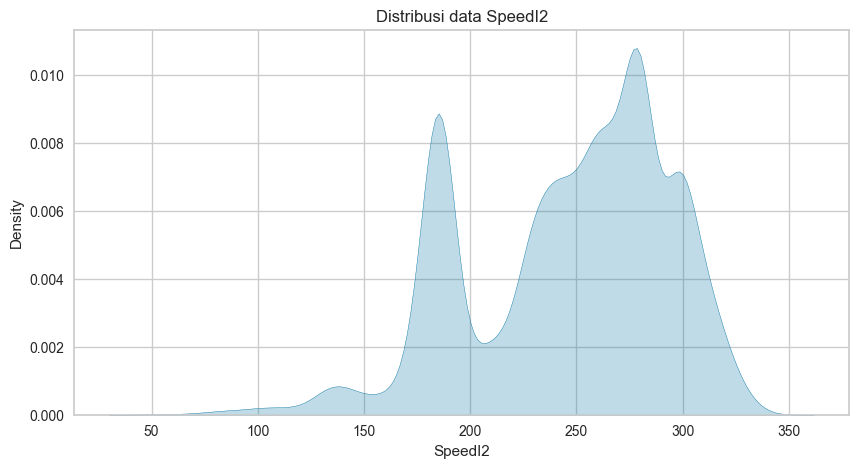

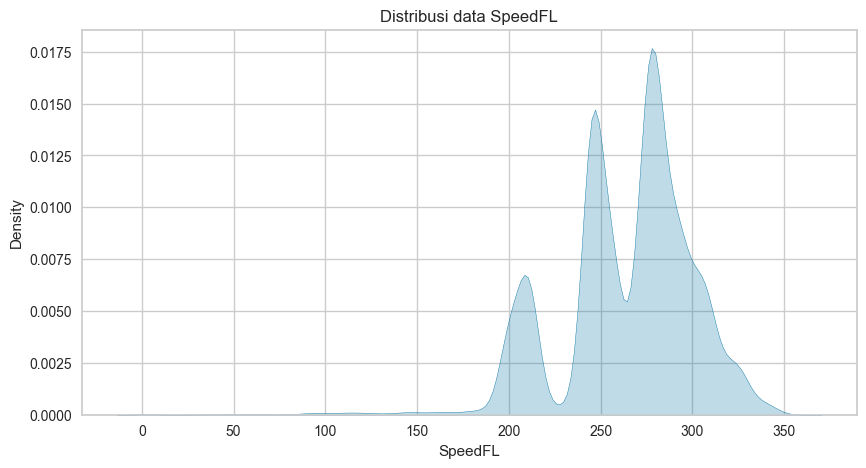

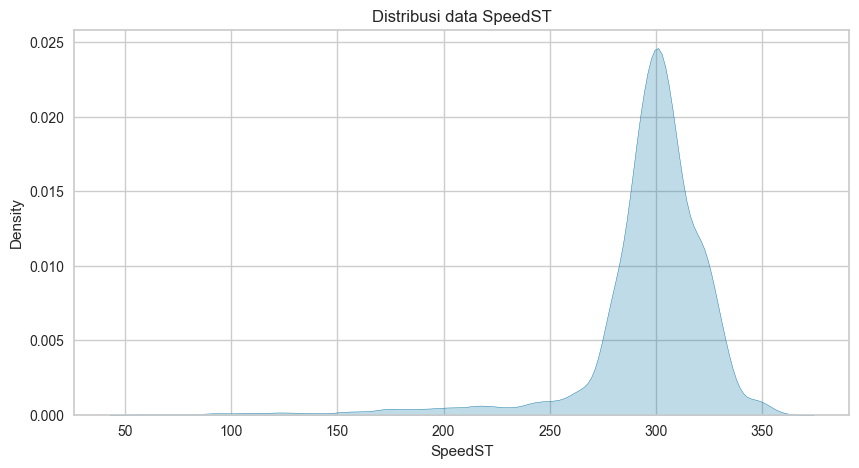

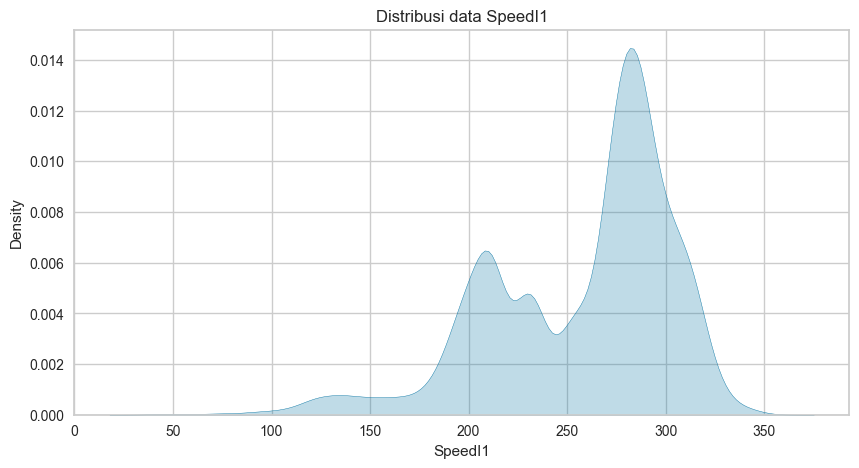

Menampilkan Modus dari data kategorikal
Mode for IsPersonalBest = False
Mode for Sector2SessionTime = 0 days 01:03:29.878000
Mode for Sector2Time = 0 days 00:00:29.905000
Mode for Sector3SessionTime = 0 days 01:06:09.122000
Mode for Sector3Time = 0 days 00:00:25.692000
Mode for LapTime = 0 days 00:01:16.993000
Mode for Sector1Time = 0 days 00:00:28.315000
Mode for Sector1SessionTime = 0 days 01:04:58.279000


In [283]:
show_data_type_and_distribution(f1_data)

In [284]:
def fill_null_mean(df):
    mean = df.mean()
    filled_df = df.fillna(mean)
    return filled_df
def fill_null_median(df):
    median = df.median()
    filled_df = df.fillna(median)
    return filled_df
def fill_null_mode(df):
    mode = df.mode()[0]
    filled_df = df.fillna(mode)
    return filled_df

In [285]:
f1_data['SpeedI2'] = fill_null_median(f1_data['SpeedI2'])
f1_data['SpeedFL'] = fill_null_median(f1_data['SpeedFL'])
f1_data['SpeedST'] = fill_null_mean(f1_data['SpeedST'])
f1_data['SpeedI1'] = fill_null_median(f1_data['SpeedI1'])
f1_data['IsPersonalBest'] = fill_null_mode(f1_data['IsPersonalBest'])
f1_data['Sector2SessionTime'] = fill_null_mode(f1_data['Sector2SessionTime'])
f1_data['Sector2Time'] = fill_null_mode(f1_data['Sector2Time'])
f1_data['Sector3SessionTime'] = fill_null_mode(f1_data['Sector3SessionTime'])
f1_data['Sector3Time'] = fill_null_mode(f1_data['Sector3Time'])
f1_data['LapTime'] = fill_null_mode(f1_data['LapTime'])
f1_data['Sector1Time'] = fill_null_mode(f1_data['Sector1Time'])
f1_data['Sector1SessionTime'] = fill_null_mode(f1_data['Sector1SessionTime'])

In [286]:
cek_null(f1_data)

Tidak ditemukan missing value pada dataset


### Handling Duplicate Value

In [287]:
print("Jumlah duplikasi data : " + str(f1_data.duplicated().sum()))

Jumlah duplikasi data : 1


In [288]:
f1_data = f1_data.drop_duplicates()

### Handling Outliers

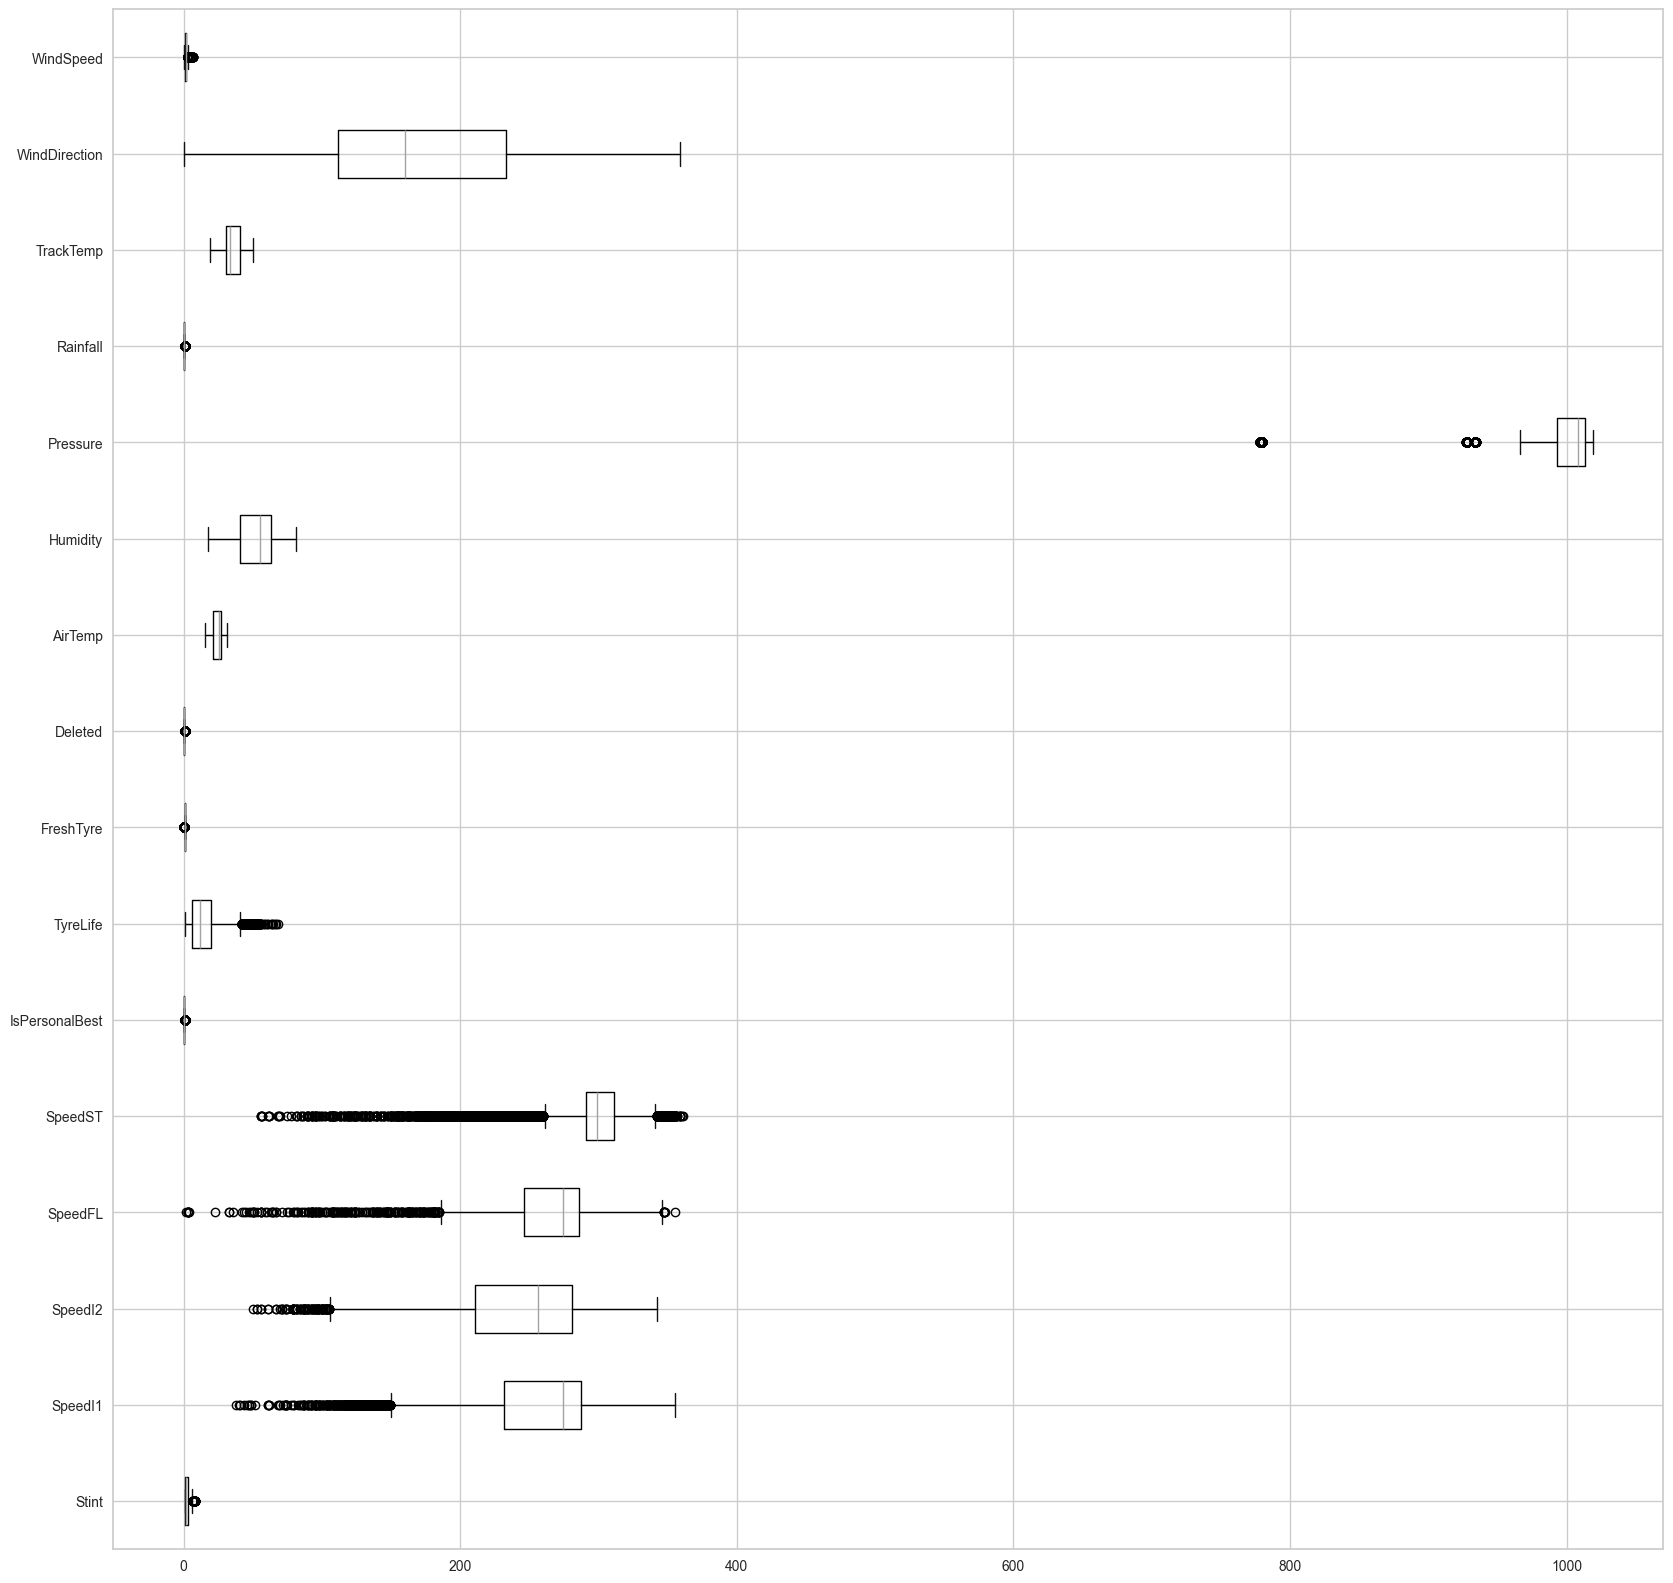

In [289]:
f1_data.boxplot(vert=False,figsize=(20,20))
plt.show()

In [290]:
laptime_numerical = f1_data.select_dtypes(include=['float64', 'int64'])
Q1 = laptime_numerical.quantile(0.25)
Q3 = laptime_numerical.quantile(0.75)
IQR = Q3 - Q1

In [291]:
print(cek_outlier(f1_data))

Persentase Outlier pada tiap atribut:
Stint             0.298078
SpeedI1           2.746580
SpeedI2           0.548251
SpeedFL           1.320062
SpeedST           7.260340
TyreLife          1.948156
AirTemp           0.000000
Humidity          0.000000
Pressure         15.824772
TrackTemp         0.000000
WindDirection     0.000000
WindSpeed         8.026827
dtype: float64
None


> Atribut `Presure` digunakan untuk memprediksi `TyreLife`, sehingga tidak kami drop .

### Encoding Categorical Attributes

In [292]:
print("Menampilkan nilai unique yang terdapat pada setiap kolom kategorikal")
print('#'*70)
print()
for col in f1_data.select_dtypes(include=object).columns:
    print(col, f": {len(f1_data[col].unique())}", f1_data[col].unique())
    print("\n")

Menampilkan nilai unique yang terdapat pada setiap kolom kategorikal
######################################################################

Time : 18744 ['0 days 02:26:25.496000' '0 days 01:13:51.732000'
 '0 days 02:22:35.139000' ... '0 days 02:00:31.678000'
 '0 days 01:07:59.947000' '0 days 02:04:03.127000']


LapTime : 14761 ['0 days 00:01:40.943000' '0 days 00:01:48.067000'
 '0 days 00:01:22.881000' ... '0 days 00:01:25.235000'
 '0 days 00:01:52.495000' '0 days 00:02:25.892000']


Sector1Time : 11540 ['0 days 00:00:46.163000' '0 days 00:00:39.129000'
 '0 days 00:00:28.890000' ... '0 days 00:01:06.782000'
 '0 days 00:00:30.620000' '0 days 00:00:52.231000']


Sector2Time : 12067 ['0 days 00:00:28.979000' '0 days 00:00:43.601000'
 '0 days 00:00:18.554000' ... '0 days 00:01:09.507000'
 '0 days 00:00:49.567000' '0 days 00:00:53.937000']


Sector3Time : 10711 ['0 days 00:00:25.801000' '0 days 00:00:25.337000'
 '0 days 00:00:35.437000' ... '0 days 00:00:21.484000'
 '0 days 00:00:28.037000

In [293]:
f1_data['Compound'] = f1_data['Compound'].map({'INTERMEDIATE':1, 'MEDIUM':4, 'HARD':2, 'SOFT':3, 'WET':0})
f1_data['Pos_cat'] = f1_data['Pos_cat'].map({'Participant':0, 'Podium':2, 'Point':1})

In [294]:
def zero_days_remover (duration):
    return duration.replace('0 days ', '')

In [295]:
time_att = []
for col in f1_data.select_dtypes(include=object).columns:
    time_att.append(col)

In [296]:
time_att

['Time',
 'LapTime',
 'Sector1Time',
 'Sector2Time',
 'Sector3Time',
 'Sector1SessionTime',
 'Sector2SessionTime',
 'Sector3SessionTime',
 'LapStartTime']

In [297]:
for time in time_att:
    f1_data[time] = f1_data[time].apply(zero_days_remover)

In [298]:
print(time_att)

['Time', 'LapTime', 'Sector1Time', 'Sector2Time', 'Sector3Time', 'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime', 'LapStartTime']


Untuk memudahkan encoding waktu, kami menghilangkan 0 days karena seluruh data memiliki 0 days dan hal tersebut tidak membantu kami dalam melakukan encoding waktu

In [299]:
import datetime


In [300]:
def time_converter (time_str):
    if '.' in time_str:
        time_str, milliseconds = time_str.split('.')
        milliseconds = int(milliseconds)
    else:
        milliseconds = 0

    x_time = datetime.datetime.strptime(time_str, '%H:%M:%S')

    total_seconds = datetime.timedelta(
        hours=x_time.hour,
        minutes=x_time.minute,
        seconds=x_time.second,
        microseconds=milliseconds / 1000  # Convert milliseconds to microseconds
    ).total_seconds()

    return total_seconds

In [301]:
for time in time_att:
    f1_data[time] = f1_data[time].apply(time_converter)

In [302]:
f1_data

,Time,LapTime,Stint,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,...,LapStartTime,Deleted,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,Pos_cat
0,8785.000496,100.000943,6.0,46.000163,28.000979,25.000801,8736.000926,8765.000905,8791.000706,283.0,...,8684.000553,False,17.1,68.0,1008.0,False,24.8,157,3.0,0
1,4431.000732,108.000067,1.0,39.000129,43.000601,25.000337,4362.000794,4406.000395,4431.000732,199.0,...,4323.000665,False,25.0,49.0,1008.5,False,43.3,275,1.0,2
2,8555.000139,82.000881,2.0,28.000890,18.000554,35.000437,8501.000150,8519.000704,8555.000141,275.0,...,8472.000258,False,17.6,57.0,1018.2,False,29.9,0,0.6,0
3,3816.000822,91.000585,1.0,28.000315,28.000929,30.000478,3898.000279,3786.000412,3816.000927,266.0,...,3724.000960,False,17.6,67.0,1007.7,False,29.5,135,1.8,2
4,6340.000072,94.000742,2.0,34.000895,29.000874,29.000973,6280.000174,6310.000048,6340.000021,274.0,...,6245.000330,False,26.1,55.0,1011.0,False,31.0,271,1.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18783,5220.000913,85.000235,2.0,30.000620,30.000668,23.000947,5166.000294,5196.000962,5220.000909,276.0,...,5135.000678,False,29.3,32.0,988.4,False,49.9,252,1.2,0
18784,4892.000309,100.000363,1.0,29.000488,42.000838,28.000037,4821.000469,4864.000307,4892.000344,297.0,...,4791.000946,False,30.0,72.0,1009.0,False,36.8,145,1.1,0
18785,7231.000678,112.000495,3.0,32.000659,49.000567,30.000269,7151.000871,7201.000438,7231.000707,309.0,...,7119.000183,False,17.6,66.0,966.7,False,30.3,146,1.1,0
18786,4079.000947,85.000938,1.0,30.000564,31.000370,24.000004,4024.000556,4055.000926,4079.000930,256.0,...,3994.000009,False,28.8,33.0,988.5,False,50.1,134,1.5,0


In [303]:
boolean_columns = ['IsPersonalBest', 'FreshTyre', 'Deleted', 'Rainfall']
f1_data = f1_data.copy()
f1_data = pd.get_dummies(f1_data, columns = boolean_columns, drop_first=True) 
f1_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18787 entries, 0 to 18787
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 18787 non-null  float64
 1   LapTime              18787 non-null  float64
 2   Stint                18787 non-null  float64
 3   Sector1Time          18787 non-null  float64
 4   Sector2Time          18787 non-null  float64
 5   Sector3Time          18787 non-null  float64
 6   Sector1SessionTime   18787 non-null  float64
 7   Sector2SessionTime   18787 non-null  float64
 8   Sector3SessionTime   18787 non-null  float64
 9   SpeedI1              18787 non-null  float64
 10  SpeedI2              18787 non-null  float64
 11  SpeedFL              18787 non-null  float64
 12  SpeedST              18787 non-null  float64
 13  Compound             18787 non-null  int64  
 14  TyreLife             18787 non-null  float64
 15  LapStartTime         18787 non-null  floa

# **EKSPLORASI**

Adakah sektor time yang paling berpengaruh terhadap performa pembalap meraih Personal Best?

In [304]:
sector_time_data = f1_data[['Sector1Time', 'Sector2Time', 'Sector3Time', 'LapTime', 'IsPersonalBest_True']]
sector_time_data

,Sector1Time,Sector2Time,Sector3Time,LapTime,IsPersonalBest_True
0,46.000163,28.000979,25.000801,100.000943,False
1,39.000129,43.000601,25.000337,108.000067,False
2,28.000890,18.000554,35.000437,82.000881,True
3,28.000315,28.000929,30.000478,91.000585,False
4,34.000895,29.000874,29.000973,94.000742,False
...,...,...,...,...,...
18783,30.000620,30.000668,23.000947,85.000235,False
18784,29.000488,42.000838,28.000037,100.000363,True
18785,32.000659,49.000567,30.000269,112.000495,False
18786,30.000564,31.000370,24.000004,85.000938,True


In [305]:
sector_time_data['Sector1Time'] = sector_time_data['Sector1Time']/sector_time_data['LapTime'] * 100
sector_time_data['Sector2Time'] = sector_time_data['Sector2Time']/sector_time_data['LapTime'] * 100
sector_time_data['Sector3Time'] = sector_time_data['Sector3Time']/sector_time_data['LapTime'] * 100
sector_time_data

C:\Users\Pendar Bintang\AppData\Local\Temp\ipykernel_21792\1955910279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sector_time_data['Sector1Time'] = sector_time_data['Sector1Time']/sector_time_data['LapTime'] * 100
C:\Users\Pendar Bintang\AppData\Local\Temp\ipykernel_21792\1955910279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sector_time_data['Sector2Time'] = sector_time_data['Sector2Time']/sector_time_data['LapTime'] * 100
C:\Users\Pendar Bintang\AppData\Local\Temp\ipykernel_21792\195591027

,Sector1Time,Sector2Time,Sector3Time,LapTime,IsPersonalBest_True
0,45.999729,28.000715,25.000565,100.000943,False
1,36.111208,39.815347,23.148446,108.000067,False
2,34.147060,21.951659,42.683001,82.000881,True
3,30.769379,30.770054,32.967346,91.000585,False
4,36.170879,30.851750,30.851855,94.000742,False
...,...,...,...,...,...
18783,35.294749,35.294806,27.059863,85.000235,False
18784,29.000383,42.000686,27.999935,100.000363,True
18785,28.571891,43.750313,26.785836,112.000495,False
18786,35.294392,36.470621,28.234987,85.000938,True


In [306]:
min_values = [
    sector_time_data['Sector1Time'].mean(),
    sector_time_data['Sector2Time'].mean(),
    sector_time_data['Sector3Time'].mean()
]

C:\Users\Pendar Bintang\AppData\Local\Temp\ipykernel_21792\761113515.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sector_time_data[['Sector1Time', 'Sector2Time', 'Sector3Time']].melt(), x='variable', y='value', palette='viridis')


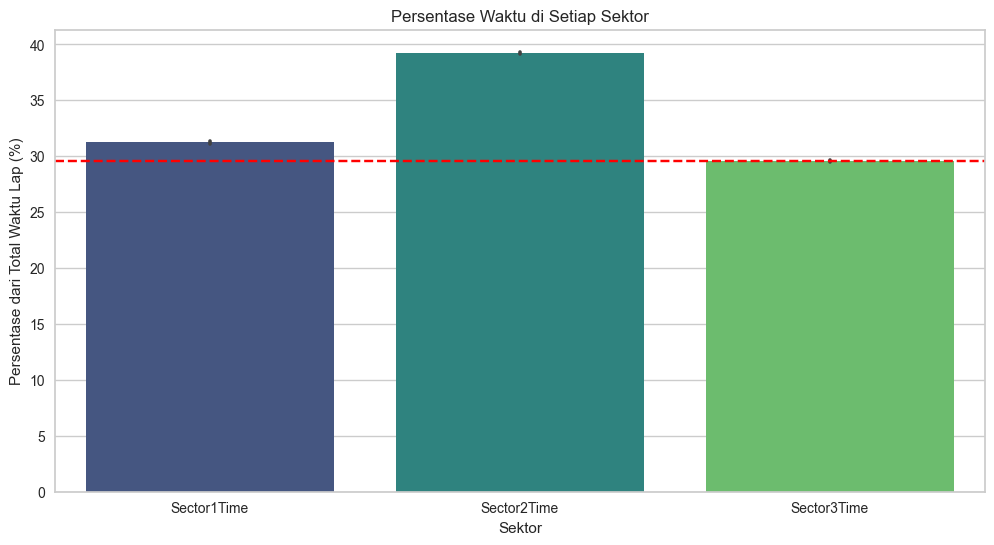

In [307]:
plt.figure(figsize=(12, 6))
sns.barplot(data=sector_time_data[['Sector1Time', 'Sector2Time', 'Sector3Time']].melt(), x='variable', y='value', palette='viridis')
plt.axhline(y = min(min_values), color = 'red', linestyle = 'dashed')
plt.title('Persentase Waktu di Setiap Sektor')
plt.xlabel('Sektor')
plt.ylabel('Persentase dari Total Waktu Lap (%)')
plt.show()

> Berdasarkan visualisasi diatas, dapat dianalisis bahwa Sector2Time memiliki pengaruh terebesar terhadap performa pembalap F1 meraih PersonaBest, karena memiliki persentase terbesar dibandingkan sector lainnya untuk memperoleh PersonalBest. Pengaruh terbaik didapatkan ketika pembalap F1 berhasil melalui sector 2 tercepat. Lalu, diikuti dengan sector 1 untuk performa terbaik kedua. Untuk pengaruh terkecil, didapatkan ketika pembalap F1 melalui sector Sector 3 tercepat.

Adakah rentang umur ban ‘TyreLife’ dengan performa terbaik dibandingkan rentang umur ban lainnya?


In [308]:
tyre_life_performance = f1_data.copy()
tyre_life_performance = tyre_life_performance[['LapTime', 'TyreLife']]

tyre_life_performance

,LapTime,TyreLife
0,100.000943,8.0
1,108.000067,6.0
2,82.000881,34.0
3,91.000585,1.0
4,94.000742,9.0
...,...,...
18783,85.000235,7.0
18784,100.000363,11.0
18785,112.000495,6.0
18786,85.000938,4.0


In [309]:
def categorize_tyrelife(tyre_age):
    if tyre_age <= 25:
        return 'New'
    elif tyre_age <= 50:
        return 'Moderate Use'
    else:
        return 'Worn Out'

In [310]:
tyre_life_performance['TyreLife'] = tyre_life_performance['TyreLife'].apply(categorize_tyrelife)
tyre_life_performance

,LapTime,TyreLife
0,100.000943,New
1,108.000067,New
2,82.000881,Moderate Use
3,91.000585,New
4,94.000742,New
...,...,...
18783,85.000235,New
18784,100.000363,New
18785,112.000495,New
18786,85.000938,New


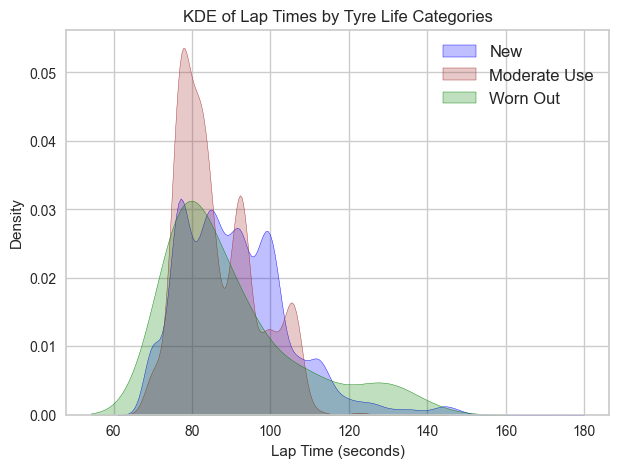

In [311]:
plt.figure(figsize=(7,5))

# KDE plot for each category
sns.kdeplot(tyre_life_performance[tyre_life_performance['TyreLife'] == 'New']['LapTime'], fill=True, color='blue')
sns.kdeplot(tyre_life_performance[tyre_life_performance['TyreLife'] == 'Moderate Use']['LapTime'], fill=True, color='brown')
sns.kdeplot(tyre_life_performance[tyre_life_performance['TyreLife'] == 'Worn Out']['LapTime'], fill=True, color='green')


# Customize the legend and labels
plt.legend(['New', 'Moderate Use', 'Worn Out'], fontsize=12)
plt.title('KDE of Lap Times by Tyre Life Categories')
plt.xlabel('Lap Time (seconds)')
plt.ylabel('Density')

# Display the plot
plt.show()

Dari hasil KDE Plot diatas, dapat dilihat bahwa distribusi semua nya bersifat *positive skewed*. Maka **median** cocok digunakan untuk menggambarkan central tendency dari data yang

In [312]:
median_tyre_life_lap_times = tyre_life_performance.groupby('TyreLife')['LapTime'].median().reset_index()
median_tyre_life_lap_times.rename(columns={'LapTime': 'MedianLapTime'}, inplace=True)
median_tyre_life_lap_times

,TyreLife,MedianLapTime
0,Moderate Use,83.000926
1,New,89.000858
2,Worn Out,84.000296


Dari hasil median diatas, dapat dilihat bahwa **Moderate Use, ketika ban berumur 31 hingga 50 tahun** memiliki laptime yang terkecil, kemudian diikuti oleh **Worn Out, ketika ban berusia diatas 50 tahun** dan terakhir merupakan **New, ketika ban berumur 0 hingga 30 tahun**

# **REGRESI**

In [313]:
# https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-models-c91c65d73af
def regression_metrics(prediction, y_test):
    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R_squared = r2_score(y_test, prediction)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))
    print('R_squared: ' + str(R_squared))

In [314]:
# Split Dataset Klasifikasi
X_regression = f1_data.drop(columns=['TyreLife'], axis=1)
y_regression = f1_data['TyreLife']

In [315]:
X_regress_train, X_regress_test, y_regress_train, y_regress_test = train_test_split(X_regression, y_regression, test_size=0.3, random_state=42)

### **Lasso**

In [316]:
lasso_alpha_list = [0.001 ,0.01, 0,1, 1, 10]
gscr_param = {'alpha': lasso_alpha_list}

In [317]:
gscr = GridSearchCV(Lasso(max_iter=2000), gscr_param, cv=10)
gscr.fit(X_regress_train, y_regress_train)


c:\Users\Pendar Bintang\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.583e+05, tolerance: 1.230e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Pendar Bintang\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.601e+05, tolerance: 1.237e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Pendar Bintang\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number o

GridSearchCV(cv=10, estimator=Lasso(max_iter=2000),
             param_grid={'alpha': [0.001, 0.01, 0, 1, 1, 10]})

In [318]:
print(gscr.best_params_)

{'alpha': 0.001}


In [319]:
lasso = Lasso(alpha=gscr.best_params_['alpha'])
lasso.fit(X_regress_train, y_regress_train)


c:\Users\Pendar Bintang\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.921e+05, tolerance: 1.369e+02
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.001)

In [320]:
from sklearn import metrics
scores = cross_val_score(lasso, X_regress_train, y_regress_train, scoring=make_scorer(metrics.r2_score), cv=5)

c:\Users\Pendar Bintang\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.321e+05, tolerance: 1.098e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Pendar Bintang\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.327e+05, tolerance: 1.081e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Pendar Bintang\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number o

In [321]:
regression_metrics(lasso.predict(X_regress_test), y_regress_test)

MAE: 5.195117293667867
MSE: 47.178240080183734
RMSE: 6.8686417929736105
R_squared: 0.5491524149065459


In [322]:
print(f'Hasil Evaluasi cross validation: {scores.mean()}')

Hasil Evaluasi cross validation: 0.5691036721298679


Dilihat dari hasil metrics yang dihasilkan, Model Lasso dengan Alpha 0.01 memiliki hasil yang terbaik diantara model lainnya

# **KLASIFIKASI**

Klasifikasi digunakan untuk membuat model dengan target `Pos_cat`

In [323]:
def classification_metrics(prediction, y_test):
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print("Confusion Matrix")
    print()
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print()

    print(f'Accuracy: {accuracy_score(y_test, prediction)}')
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

In [324]:
X_classification = f1_data.drop(columns=['Pos_cat'], axis=1)
y_classification = f1_data['Pos_cat']

In [325]:
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_classification, y_classification, test_size=0.3, random_state=42)

In [326]:
#Standarisasi
scaler = MinMaxScaler()

X_class_train = scaler.fit_transform(X_class_train)
X_class_test = scaler.transform(X_class_test)

### **Random Forest Hypertuned**

In [327]:
# Random Forest Hyperparameter
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'criterion': ['entropy', 'gini'],
               'min_samples_split': [5, 10, 15, 20, 25],
               'min_samples_leaf': [1, 2, 4],
               'max_depth' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
               'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 
               }

rf_f1_hp = RandomForestClassifier()
clf_rfc_f1 = RandomizedSearchCV(rf_f1_hp, param_distributions=param_grid, cv=3, n_iter=100, n_jobs=-1, verbose=2, random_state=42)
clf_rfc_f1.fit(X_class_train, y_class_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [5, 10, 15, 20,
                                                              25],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [328]:
print(clf_rfc_f1.best_params_)

{'n_estimators': 2000, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 60, 'criterion': 'entropy'}


In [329]:
rf_f1_hp_applied = RandomForestClassifier(**clf_rfc_f1.best_params_)

In [330]:
rf_f1_hp_applied.fit(X_class_train, y_class_train)

RandomForestClassifier(criterion='entropy', max_depth=60, min_samples_split=5,
                       n_estimators=2000)

In [331]:
rf_f1_hp_applied_predict = rf_f1_hp_applied.predict(X_class_test)
classification_metrics(rf_f1_hp_applied_predict,y_class_test)

Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      2589
           1       0.74      0.77      0.75      2133
           2       0.84      0.65      0.73       915

    accuracy                           0.80      5637
   macro avg       0.81      0.77      0.78      5637
weighted avg       0.80      0.80      0.80      5637



Confusion Matrix



prediction,0,1,2
actual,,,
0,2289,291,9
1,395,1635,103
2,43,278,594




Accuracy: 0.8014901543374136
F1 Macro Average: 0.7826773854421676
F1 Micro Average: 0.8014901543374136
Precision Macro Average: 0.8075255808726461
Precision Micro Average: 0.8014901543374136
Recall Macro Average: 0.7666104974676661
Recall Micro Average: 0.8014901543374136



### **CLUSTERING**

#### **KMEANS**

In [332]:
f1_ftrs = f1_data.copy()
f1_ftrs.head()

,Time,LapTime,Stint,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,...,Humidity,Pressure,TrackTemp,WindDirection,WindSpeed,Pos_cat,IsPersonalBest_True,FreshTyre_True,Deleted_True,Rainfall_True
0,8785.000496,100.000943,6.0,46.000163,28.000979,25.000801,8736.000926,8765.000905,8791.000706,283.0,...,68.0,1008.0,24.8,157,3.0,0,False,False,False,False
1,4431.000732,108.000067,1.0,39.000129,43.000601,25.000337,4362.000794,4406.000395,4431.000732,199.0,...,49.0,1008.5,43.3,275,1.0,2,False,True,False,False
2,8555.000139,82.000881,2.0,28.000890,18.000554,35.000437,8501.000150,8519.000704,8555.000141,275.0,...,57.0,1018.2,29.9,0,0.6,0,True,True,False,False
3,3816.000822,91.000585,1.0,28.000315,28.000929,30.000478,3898.000279,3786.000412,3816.000927,266.0,...,67.0,1007.7,29.5,135,1.8,2,False,True,False,False
4,6340.000072,94.000742,2.0,34.000895,29.000874,29.000973,6280.000174,6310.000048,6340.000021,274.0,...,55.0,1011.0,31.0,271,1.3,1,False,True,False,False


In [333]:
features = ['Sector1Time', 'Sector2Time', 'Sector3Time']
f1_ftrs = f1_data[features]
f1_ftrs.head()

,Sector1Time,Sector2Time,Sector3Time
0,46.000163,28.000979,25.000801
1,39.000129,43.000601,25.000337
2,28.000890,18.000554,35.000437
3,28.000315,28.000929,30.000478
4,34.000895,29.000874,29.000973


In [334]:
# Menghitung Silhouette Coeff
for k in [2, 3, 4, 5]:
    # Mendefinisikan model K-Means dengan nilai k tertentu
    clusterer = KMeans(n_clusters = k, n_init=10)

    # Menghitung sihouette_score untuk mengukur seberapa baik klaster yang terbentuk.
    cluster_labels = clusterer.fit_predict(f1_ftrs)
    silhouette_avg_cc = silhouette_score(f1_ftrs, cluster_labels)
    print(f"Untuk k = {k}, rata-rata silhouette_coefficient adalah: {silhouette_avg_cc}")

Untuk k = 2, rata-rata silhouette_coefficient adalah: 0.36634948812403434
Untuk k = 3, rata-rata silhouette_coefficient adalah: 0.3344309791485231
Untuk k = 4, rata-rata silhouette_coefficient adalah: 0.36163181072179235
Untuk k = 5, rata-rata silhouette_coefficient adalah: 0.3774524545122578


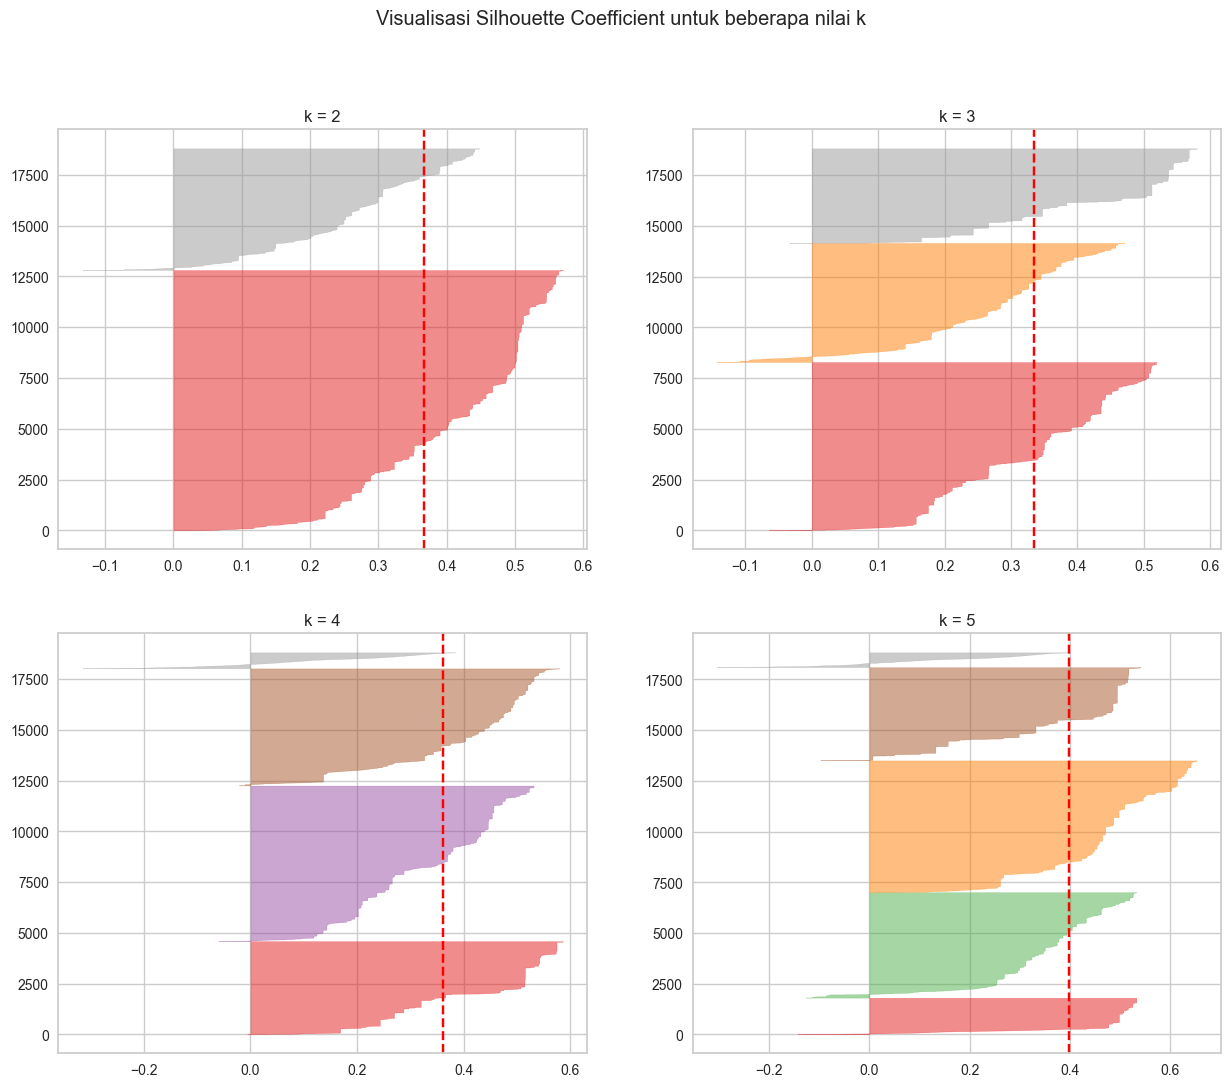

In [335]:
fig, ax = plt.subplots(2, 2, figsize=(15,12))
fig.suptitle("Visualisasi Silhouette Coefficient untuk beberapa nilai k")
for k in [2, 3, 4, 5]:
    # Mendefinisikan model K-Means dengan nilai k tertentu
    clusterer = KMeans(n_clusters=k, n_init=10)

    # Memvisualisasikan densitas tiap klaster yang terbentuk
    q, mod = divmod(k, 2)
    ax[q-1][mod].set_title(f"k = {k}")
    visualizer = SilhouetteVisualizer(clusterer, ax = ax[q-1][mod])
    visualizer.fit(f1_ftrs)

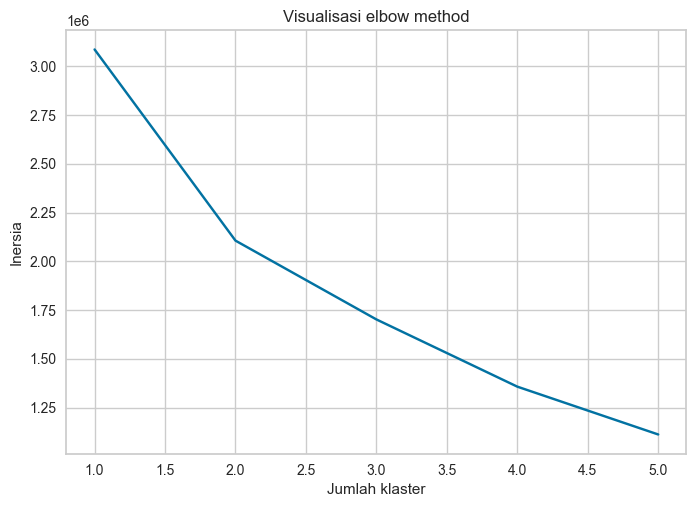

In [336]:
inertia = []
for cluster in range(1, 6):
    km = KMeans(n_clusters=cluster, n_init=10)
    km = km.fit(f1_ftrs)
    inertia.append(km.inertia_)

plt.plot(range(1, 6), inertia, 'bx-')
plt.xlabel('Jumlah klaster')
plt.ylabel('Inersia')
plt.title('Visualisasi elbow method')
plt.show()

In [337]:
kmeans = KMeans(n_clusters=2, n_init=10)
assignment_cc = kmeans.fit_predict(f1_ftrs)

In [338]:
df_with_clusters_cc = pd.DataFrame(f1_ftrs.copy())
df_with_clusters_cc['cluster'] = assignment_cc
df_with_clusters_cc.head()

,Sector1Time,Sector2Time,Sector3Time,cluster
0,46.000163,28.000979,25.000801,0
1,39.000129,43.000601,25.000337,0
2,28.000890,18.000554,35.000437,1
3,28.000315,28.000929,30.000478,1
4,34.000895,29.000874,29.000973,1


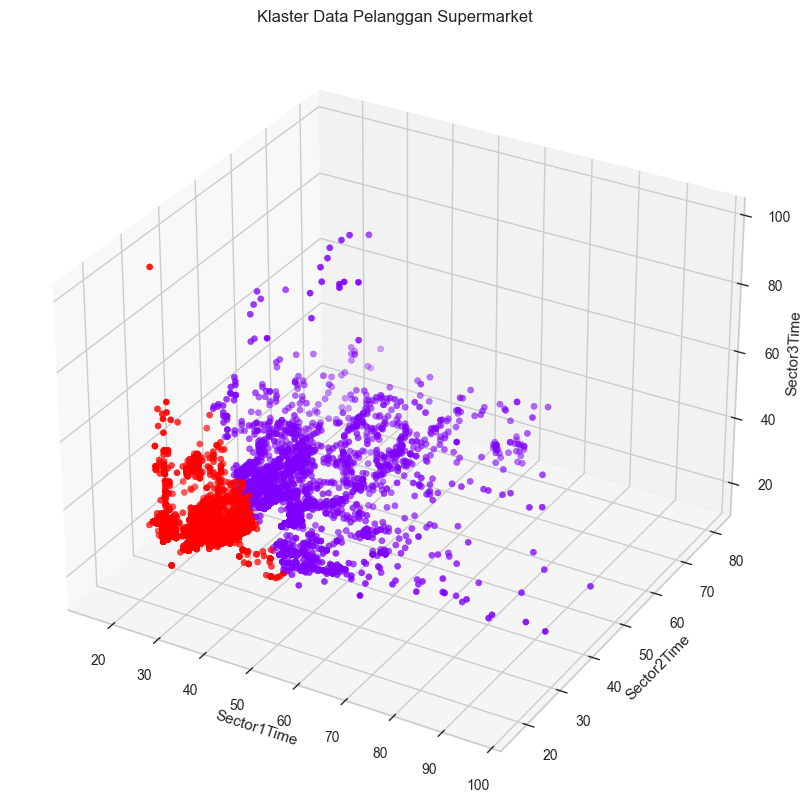

In [339]:
# visualisasi
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection="3d")

# Menyiapkan beberapa variabel yang diperlukan untuk visualisasi
x = df_with_clusters_cc[features[0]]
y = df_with_clusters_cc[features[1]]
z = df_with_clusters_cc[features[2]]
cluster = df_with_clusters_cc['cluster']

# Memvisualisasikan hasilnya
ax.scatter(x, y, z, c = cluster, cmap = "rainbow")
plt.title("Klaster Data Pelanggan Supermarket")
plt.grid(False)
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])

plt.show()

> **Kluster merah** menujukkan waktu balapan yang singkat, Sector 1,2, dan 3 membutuhkan waktu yang sedikit untuk dilalui. Hal ini menunjukkan untuk melakukan 1 lap memiliki **total LapTime yang rendah**<br><br>
> **Kluster ungu** menunjukkan waktu balapan yang cenderung lebih lama, sector 1 dan 2 memiliki persebaran yang lebih luas sementara sector 3 persebarannya tidak seluas sector 1 dan 2. Hal ini menggambarkan cluster ungu memiliki waktu untuk melakukan 1 lap balapan memiliki **total Laptime yang lebih lama**  